In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('science')

In [2]:
df = pd.read_csv("AF_stars_full_table.csv")

In [3]:
df

,kic,pulsating,freq,amp,V_UBV,Av_1,Av_sig_p,Av_sig_m,astrometric_excess_noise,skewness,...,loglbol_V-g,new_mass,mass_qflag,new_mass_std,new_radius,new_logg,new_r_std,new_logg_std,dSct,zams_flag
0,892667,0.0,17.844223,0.007057,13.228,0.471,0.054,0.101,0.000000,0.735795,...,-0.029245,1.46,0,0.25,2.25,3.89,0.16,0.10,0,0
1,892828,0.0,18.003054,0.005777,13.292,0.476,0.060,0.090,0.011050,0.734706,...,-0.026766,1.34,0,0.25,1.77,4.07,0.13,0.11,0,0
2,893234,0.0,13.342990,0.005637,NaN,0.454,0.058,0.087,0.000000,0.625803,...,NaN,1.29,0,0.25,1.63,4.11,0.12,0.11,0,0
3,1026133,0.0,31.264079,0.006450,13.219,0.492,0.044,0.075,0.093332,0.679167,...,-0.038360,1.46,0,0.25,1.93,4.02,0.14,0.10,0,0
4,1026255,1.0,16.615259,0.031939,12.585,0.563,0.009,0.072,0.000000,4.309565,...,-0.046476,1.64,0,0.25,2.49,3.85,0.18,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,12884588,0.0,5.155487,0.005922,12.771,0.307,0.009,0.017,0.000000,0.647262,...,-0.052892,1.46,0,0.25,1.73,4.13,0.14,0.10,0,0
14327,12885086,1.0,26.871816,0.526915,10.791,0.288,0.016,0.041,0.051577,44.712829,...,-0.033295,1.71,0,0.25,1.99,4.07,0.16,0.09,1,0
14328,12885346,0.0,6.811033,0.021516,14.093,0.325,0.050,0.050,0.200022,0.673898,...,-0.059415,2.18,0,0.25,2.16,4.11,0.24,0.11,0,0
14329,12934616,0.0,21.436315,0.015400,12.167,0.280,0.026,0.039,0.000000,0.643507,...,-0.041862,1.46,0,0.25,2.23,3.91,0.18,0.10,0,0


In [4]:
print(df.corr()['skewness'].sort_values().to_string())

absolute_magnitude_V         -0.360627
absolute_magnitude_g         -0.356531
kic_umag                     -0.308684
new_logg                     -0.265002
sdss_g                       -0.241745
kic_gmag                     -0.240563
gaia_phot_g_mean_mag_x       -0.228554
kic_rmag                     -0.225697
kic_zmag                     -0.221314
kic_imag                     -0.216321
V_UBV                        -0.212022
new_logg_std                 -0.196529
loggi                        -0.184810
freq                         -0.175384
mass_qflag                   -0.135671
zams_flag                    -0.077340
gaia_source_id               -0.072043
e_FeHi                       -0.059657
kic_dec                      -0.044001
gaia_dec                     -0.044001
kic                          -0.040687
loglbol_V-g                   0.005096
r_Teffi                       0.025312
parallax                      0.026969
frac_parallax_err             0.033292
astrometric_excess_noise 

In [61]:
plt.style.use('science')

In [62]:
6 / (2*1.618 )

1.8541409147095178

/home/daniel/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Probability density')

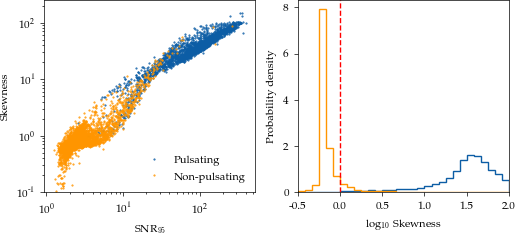

In [64]:
fig, axes = plt.subplots(1,2, figsize=[6, 2.5])

ax = axes[0]
m = df.dSct == 1
m |= df.dSct == 2
ax.plot(df[m].snr95, df[m].skewness, '.', markersize=1, label='Pulsating', c='C0', rasterized=True)
t = df[m]
# plt.scatter(t.snr95, t.skewness, c=np.log10(t.amp))
m = df.dSct == 0
ax.plot(df[m].snr95, df[m].skewness, '.', markersize=1, label='Non-pulsating', c='C2', rasterized=True)

ax.legend(fontsize=8, loc='lower right')
ax.set_xscale("log")
ax.set_yscale('log')

ax.set_ylim(10**(-1), None)
ax.set_xlabel(r'SNR$_{95}$')
ax.set_ylabel('Skewness')

ax = axes[1]
# Both
# plt.hist(np.log10(df.skewness), bins=30, range=(-0.5, 2), histtype='step')

m = df.dSct == 1
m |= df.dSct == 2
t = df[m]
ax.hist(np.log10(t.skewness), bins=30, range=(-0.5, 2.), histtype='step', color='C0', density=True)

m = df.dSct == 0
t = df[m]
ax.hist(np.log10(t.skewness), bins=30, range=(-0.5, 2.), histtype='step', color='C2', density=True)

ax.set_xlim(-0.5, 2)
ax.axvline(np.log10(1), c='r', linestyle='dashed')
ax.set_xlabel(r'log$_{10}$ Skewness')
ax.set_ylabel('Probability density')
# plt.yscale('log')
# plt.savefig('skewness_snr.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [71]:
m = df.dSct == 1
m |= df.dSct == 2
t = df[m]

skew = t.skewness.values
np.percentile(skew, [5, 50, 99])

array([ 5.26874041, 35.08397216, 98.9826697 ])

(-0.7, 2.0)

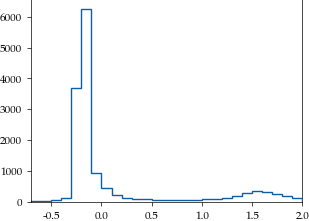

In [20]:
plt.hist(np.log10(df.skewness), bins=30, range=(-1, 2.), histtype='step')
plt.xlim(-0.7, 2.)